
# Introduction to Regression Diagnostics

In regression analysis, it is crucial not only to estimate the parameters of a model but also to evaluate how well the model fits the data. This process is known as regression diagnostics.
In this notebook, we will explore key diagnostics that help us check:

- The normality of residuals
- Homoscedasticity (constant variance of residuals)
- Linearity
- Independence of errors

Understanding these diagnostics is vital for validating the assumptions of linear regression.

### What is a Regression Model?

A simple linear regression model can be written as:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

Where:
- \( y \) is the dependent variable
- \( x \) is the independent variable
- \( \beta_0 \) and \( \beta_1 \) are the model parameters
- \( \epsilon \) is the error term (residual)

The assumptions of linear regression include that residuals \( \epsilon \) should be normally distributed, have constant variance, and be independent.

### Objective

This notebook will guide you through key regression diagnostics to check these assumptions.



This example file shows how to use a few of the ``statsmodels`` regression diagnostic tests in a real-life context. You can learn about more tests and find out more information about the tests here on the [Regression Diagnostics page.](https://www.statsmodels.org/stable/diagnostic.html)

Note that most of the tests described here only return a tuple of numbers, without any annotation. A full description of outputs is always included in the docstring and in the online ``statsmodels`` documentation. For presentation purposes, we use the ``zip(name,test)`` construct to pretty-print short descriptions in the examples below.

In [1]:

import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Guerry.csv"
dat = pd.read_csv(url)

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols("Lottery ~ Literacy + np.log(Pop1831)", data=dat).fit()


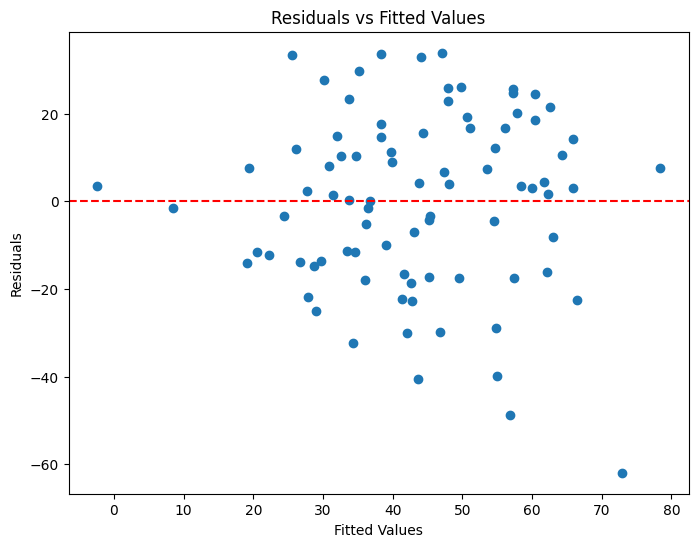

In [ ]:

# Plot the residuals to visually inspect them
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, results.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


In [ ]:

# Perform the Jarque-Bera test for normality of residuals
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
print(list(zip(name, test)))


[('Jarque-Bera', 3.39360802484318), ('Chi^2 two-tail prob.', 0.18326831231663254), ('Skew', -0.4865803431122347), ('Kurtosis', 3.003417757881634)]


In [ ]:

# Perform the Breusch-Pagan test for heteroscedasticity
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
print(list(zip(name, test)))


[('Lagrange multiplier statistic', 4.893213374094005), ('p-value', 0.08658690502352002), ('f-value', 2.5037159462564618), ('f p-value', 0.08794028782672814)]


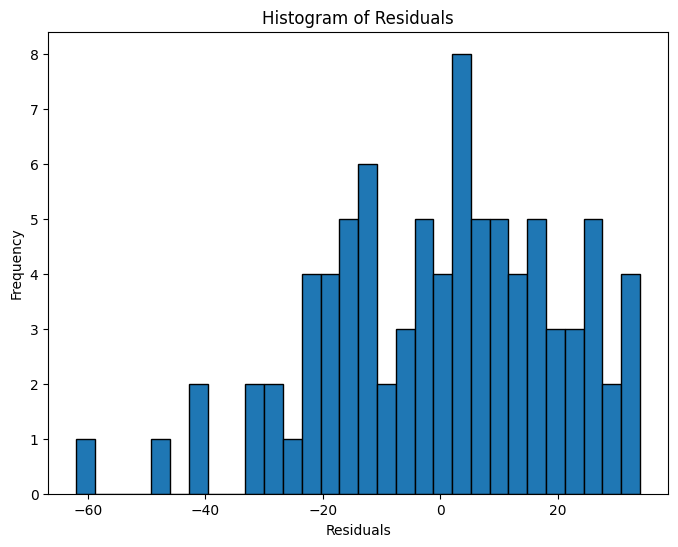

In [ ]:

# Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
plt.hist(results.resid, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



# Exploring Linear Regression with `statsmodels`

Linear regression is one of the most commonly used techniques in data analysis. It helps in modeling the relationship between a dependent variable and one or more independent variables. The simplest form of linear regression is when there is only one independent variable (simple linear regression). When there are multiple independent variables, we call it **multiple linear regression**.

## Why Use Linear Regression?
Linear regression allows us to:
1. Understand relationships between variables.
2. Make predictions for future data.
3. Evaluate the importance of different variables.
4. Check the assumptions of the model (via diagnostics).

`statsmodels` provides tools to simplify the process of fitting, analyzing, and interpreting linear regression models.

### Packages in `statsmodels` for Linear Regression
In `statsmodels`, there are several tools for fitting linear regression models. Some of the commonly used packages are:
- **`statsmodels.formula.api`**: Allows fitting models using R-style formulas.
- **`statsmodels.regression.linear_model.OLS`**: Fits ordinary least squares (OLS) models.
- **`statsmodels.api.add_constant()`**: Adds an intercept to your model.

We'll explore these tools in the upcoming examples.



## Exercise: Fitting a New Linear Regression Model

In this exercise, you will fit a new linear regression model. The code is partially completed, and you'll need to load a dataset of your choice and adjust the formula accordingly.

### Steps:
1. Load your dataset using `pandas`.
2. Fit a regression model with two or more variables.
3. Perform diagnostics, including residuals plots, normality tests, and heteroscedasticity tests.

The following code provides the structure for this exercise:


In [7]:
import kagglehub
import pandas as pd
import os
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
# Download latest version
dataset_dir = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        filepath = os.path.join(dataset_dir, filename)
        break  # Stop after finding the first CSV file

print("Path to dataset files:", filepath)  # Print the path to the CSV file
data = pd.read_csv(filepath)  # Read the CSV file into a pandas DataFrame
data.head()

Path to dataset files: /root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4/CAR DETAILS FROM CAR DEKHO.csv


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     166.6
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           2.03e-37
Time:                        19:43:01   Log-Likelihood:                -63660.
No. Observations:                4340   AIC:                         1.273e+05
Df Residuals:                    4338   BIC:                         1.273e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.621e+05    1.5e+04     44.232      0.0

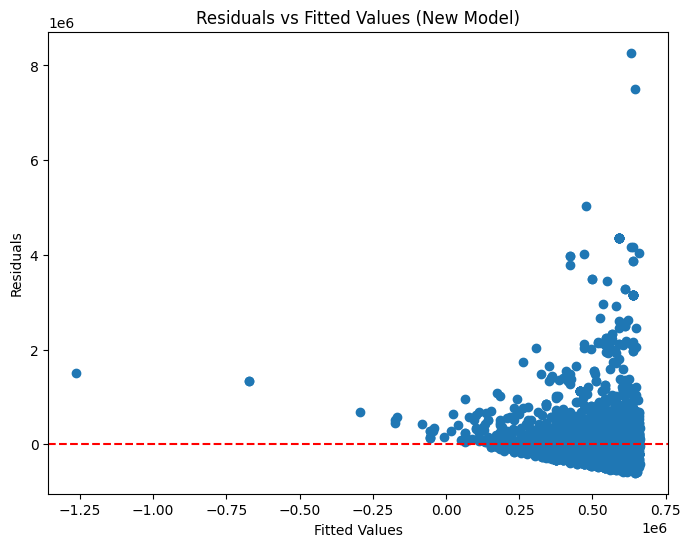

[('Jarque-Bera', 266817.52105718415), ('Chi^2 two-tail prob.', 0.0), ('Skew', 4.883185306326592), ('Kurtosis', 40.1497860123613)]
[('Lagrange multiplier statistic', 20.877685249216167), ('p-value', 4.8956472351582746e-06), ('f-value', 20.968935818694185), ('f p-value', 4.798673956450642e-06)]


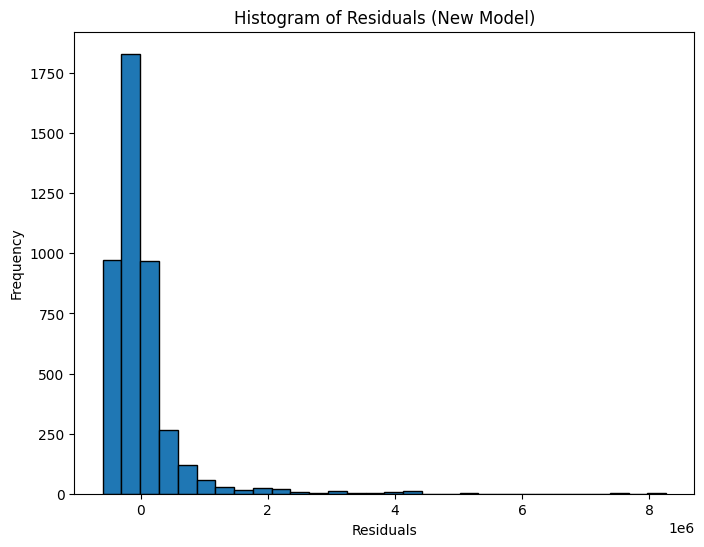

In [9]:
import matplotlib.pyplot as plt
# Step 1: Load your data
# Example:
# dat = pd.read_csv("your_dataset.csv")

# Step 2: Fit the new regression model
# Replace 'dependent_variable' and 'independent_variable' with your column names
new_results = smf.ols("selling_price ~ km_driven ", data=data).fit()

# Step 3: Inspect the results
print(new_results.summary())

# Step 4: Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(new_results.fittedvalues, new_results.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (New Model)')
plt.show()

# Step 5: Perform Jarque-Bera test for normality of residuals
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(new_results.resid)
print(list(zip(name, test)))

# Step 6: Perform the Breusch-Pagan test for heteroscedasticity
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(new_results.resid, new_results.model.exog)
print(list(zip(name, test)))

# Step 7: Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
plt.hist(new_results.resid, bins=30, edgecolor='black')
plt.title('Histogram of Residuals (New Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



## Exercises

1. **Provide your dataset** and fit a multiple linear regression model.
   - Use at least two independent variables.
   - Interpret the coefficients and \(R^2\).
   
2. **Perform the diagnostics**:
   - Plot the residuals vs fitted values.
   - Test the normality of residuals using the Jarque-Bera test.
   - Test for heteroscedasticity using the Breusch-Pagan test.
   - Plot a histogram of the residuals.

3. **Interpret the results**:
   - Are the residuals normally distributed?
   - Does your model meet the assumption of homoscedasticity (constant variance)?
   - What improvements would you suggest based on your diagnostics?



## Kaggle Datasets for Linear Regression

Here are some datasets from Kaggle that you can use for the linear regression exercise. These datasets are commonly used for regression tasks and are great for practicing diagnostics and model evaluation:

1. **House Prices - Advanced Regression Techniques**  
   - [House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)  
   - Description: This dataset includes various features of houses, such as the number of rooms, lot area, and other characteristics. You can predict the sale price of houses using these features.

2. **Student Performance**  
   - [Student Performance Dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)  
   - Description: This dataset includes student scores in various subjects along with other features like study time, health, and parental education levels. It’s great for building models that predict exam scores.

3. **Car Price Prediction**  
   - [Car Price Dataset](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)  
   - Description: This dataset contains information about cars, such as engine size, mileage, fuel type, and selling price. You can build a regression model to predict the selling price of cars.

4. **Boston House Prices**  
   - [Boston House Prices Dataset](https://www.kaggle.com/vikrishnan/boston-house-prices)  
   - Description: A classic dataset used for regression tasks. It contains features related to housing in the Boston area, such as the number of rooms and crime rate, with the goal of predicting housing prices.

5. **Insurance Charges Prediction**  
   - [Insurance Dataset](https://www.kaggle.com/mirichoi0218/insurance)  
   - Description: This dataset contains information about medical insurance charges along with features like age, gender, BMI, number of children, and smoking status. The goal is to predict the insurance charges based on these factors.

You can download these datasets and use them to practice fitting linear regression models and performing diagnostics.
